* 精度 (base 60 to base 10)
* plimton 322は逆数計算に使えるか

In [134]:
def nest(f, x, c):
    for i in range(c):
        x = f(x)
    return x

In [136]:
nest(f, 2, 4)

1.4142135623746899

In [137]:
nest(lambda x: (x+2/x)/2, 2, 4)

1.4142135623746899

In [142]:
nest(lambda x: Fraction(x+Fraction(2,x), 2), 2, 4)

Fraction(665857, 470832)

In [141]:
float(Fraction(665857, 470832))

1.4142135623746899

In [139]:
type(f), type(lambda x: (x+2/x)/2)

(function, function)

`lambda` を使うと
* 単純な関数を繰り返し使いたいとき
    * 名前を付けなくていい
    * 引数の中で定義できる
    * `return` を省ける (式は一個だけ)
* 複雑な関数を使いたいときは
    * 関数定義内で関数を定義する

* [list - how to write a function like Mma's NestList in Python - Stack Overflow](https://stackoverflow.com/questions/12435298/how-to-write-a-function-like-mmas-nestlist-in-python)

In [96]:
def nestList(f,x,c):
    for i in range(c):
        yield x
        x = f(x)
    yield x

In [97]:
f = lambda x: (x+2/x)/2

In [98]:
list(nestList(f,2,4))

[2, 1.5, 1.4166666666666665, 1.4142156862745097, 1.4142135623746899]

In [99]:
import math
math.sqrt(2)

1.4142135623730951

In [143]:
from fractions import Fraction

f = lambda x: Fraction(x+Fraction(2,x), 2)

In [144]:
list(nestList(f,2,4))

[2,
 Fraction(3, 2),
 Fraction(17, 12),
 Fraction(577, 408),
 Fraction(665857, 470832)]

In [64]:
float(Fraction(665857, 470832))

1.4142135623746899

In [66]:
import matplotlib.pyplot as plt
import numpy as np

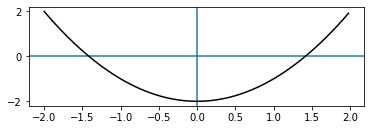

In [67]:
f = lambda x: x**2-2

t = np.arange(-2.0, 2.0, 0.02)

plt.figure()
plt.subplot(211)

plt.axhline(0)
plt.axvline(0)

plt.plot(t, f(t), 'k')

In [80]:
a = np.linspace(1, 1.5, 100)
a

array([1.        , 1.00505051, 1.01010101, 1.01515152, 1.02020202,
       1.02525253, 1.03030303, 1.03535354, 1.04040404, 1.04545455,
       1.05050505, 1.05555556, 1.06060606, 1.06565657, 1.07070707,
       1.07575758, 1.08080808, 1.08585859, 1.09090909, 1.0959596 ,
       1.1010101 , 1.10606061, 1.11111111, 1.11616162, 1.12121212,
       1.12626263, 1.13131313, 1.13636364, 1.14141414, 1.14646465,
       1.15151515, 1.15656566, 1.16161616, 1.16666667, 1.17171717,
       1.17676768, 1.18181818, 1.18686869, 1.19191919, 1.1969697 ,
       1.2020202 , 1.20707071, 1.21212121, 1.21717172, 1.22222222,
       1.22727273, 1.23232323, 1.23737374, 1.24242424, 1.24747475,
       1.25252525, 1.25757576, 1.26262626, 1.26767677, 1.27272727,
       1.27777778, 1.28282828, 1.28787879, 1.29292929, 1.2979798 ,
       1.3030303 , 1.30808081, 1.31313131, 1.31818182, 1.32323232,
       1.32828283, 1.33333333, 1.33838384, 1.34343434, 1.34848485,
       1.35353535, 1.35858586, 1.36363636, 1.36868687, 1.37373

In [81]:
b = list(map(f, a))
b;

In [82]:
i = bisect.bisect(b, 0)
i

83

In [83]:
a[i-1:i+1]

array([1.41414141, 1.41919192])

In [84]:
a[i-1], a[i]

(1.4141414141414141, 1.4191919191919191)

In [85]:
a = np.linspace(a[i-1], a[i], 1000)
a;

In [86]:
b = list(map(f, a))
b;

In [87]:
i=bisect.bisect(b, 0)
i

15

In [88]:
a[i-1:i+1]

array([1.41421219, 1.41421725])

In [19]:
remainder   = 1
denominator = 4
for _ in range(10):
    numerator = remainder * 10
    quotient, remainder = divmod(numerator, denominator)
    print(quotient, end=', ')

2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 

In [137]:
x = 152.2756
math.sqrt(x)

12.34

In [138]:
x_i, x_f = str(x).split('.')
x_i = '0'*(len(i)%2) + x_i
x_f = x_f + '0'*(len(f)%2)
x_i, x_f

('0152', '2756')

In [144]:
import itertools

xx = list(map(int,
              itertools.chain(*[[y[i:i+2] for i in range(0,len(y),2)]
                                for y in (x_i, x_f)])))
xx

[1, 52, 27, 56]

In [134]:
p, r = 0, 0

for c in xx:
    c += r*100
    x = 0
    while (20*p+(x+1))*(x+1) <= c:
        x+=1
    y = (20*p+x)*x
    p = 10*p+x
    r = c - y

In [135]:
p, r

(1234, 0)

In [118]:
# [Methods of computing square roots - Wikipedia]
# (https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Decimal_(base_10))

import itertools

def long_division(s):
    # split by two digits
    si, sf = str(s).split('.')
    si = '0'*(len(si)%2) + si
    sf = sf + '0'*(len(sf)%2)
    
    sl = itertools.chain(*[[sx[i:i+2] for i in range(0,len(sx),2)]
                           for sx in (si, sf)])
    
    # find x, y and p
    p, r = 0, 0
    for c in map(int, sl):
        c += r*100
        x = 0
        while (2*(10*p)+(x+1))*(x+1) <= c:
            x+=1
        y = (20*p+x)*x
        p = 10*p+x     # x is 'quotient'
        r = c - y      # r is 'remainder'
    return p, r

In [119]:
long_division(152.2756)

(1234, 0)

In [89]:
12.34**2

152.2756

In [159]:
# [Methods of computing square roots - Wikipedia]
# (https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Decimal_(base_10))

import itertools
import numpy as np

def square_root_by_long_division(cif):
    # split by two digits, each side of period (integer.fractions)
    ci, cf = str(cif).split('.')
    ci = '0'*(len(ci)%2) + ci
    cf = cf + '0'*(len(cf)%2)
    
    #sl = itertools.chain(*[[sx[i:i+2] for i in range(0,len(sx),2)]
    #                       for sx in (si, sf)])
    cl = np.array([[cx[i:i+2] for i in range(0,len(cx),2)]
                   for cx in (ci, cf)])

    print(cl)
    
    def cy(p, px):
        return (2*(10*p)+px)*px
    
    p, r = 0, 0
    for c in map(int, cl.flatten()):
        c += r*100
        px = 0
        while cy(p, px+1) <= c:
            px+=1
        r = c - cy(p, px) # r is 'remainder'
        p = 10*p+px       # x is 'quotient'
        print(p,r)
    return p, r

In [160]:
square_root_by_long_division(152.2756)

[['01' '52']
 ['27' '56']]
1 0
12 8
123 98
1234 0


(1234, 0)

In [170]:
import itertools
[n*m for n,m in itertools.product(range(1,10), repeat=2)]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 27,
 4,
 8,
 12,
 16,
 20,
 24,
 28,
 32,
 36,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 6,
 12,
 18,
 24,
 30,
 36,
 42,
 48,
 54,
 7,
 14,
 21,
 28,
 35,
 42,
 49,
 56,
 63,
 8,
 16,
 24,
 32,
 40,
 48,
 56,
 64,
 72,
 9,
 18,
 27,
 36,
 45,
 54,
 63,
 72,
 81]

In [91]:
a = np.linspace(0, 100, 1000)

In [92]:
i=np.searchsorted(a,79)

In [93]:
a[i-1:i+2]

array([78.97897898, 79.07907908, 79.17917918])

In [95]:
# [python - How to find an index at which a new item can be inserted into sorted list and keep it sorted? - Stack Overflow]
# (https://stackoverflow.com/questions/11290767/how-to-find-an-index-at-which-a-new-item-can-be-inserted-into-sorted-list-and-ke)
import bisect
i= bisect.bisect(a,79.07907908)

a[i], a[i-1:i+1]

(79.17917917917919, array([79.07907908, 79.17917918]))